In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import os

In [4]:
train_path = "D:/datascience-Data/cell_images/train"
test_path = "D:/datascience-Data/cell_images/test"

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+"/parasitized")

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [8]:
para_cell = imread(train_path+"/parasitized"+"/C100P61ThinF_IMG_20150918_144104_cell_162.png")

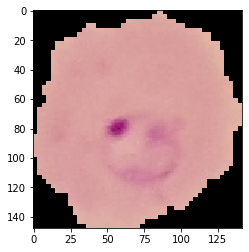

In [9]:
plt.imshow(para_cell)

In [10]:
para_cell.shape

(148, 142, 3)

In [11]:
len(os.listdir(train_path+"/parasitized"))

12480

In [12]:
len(os.listdir(train_path+"/uninfected"))

12480

In [13]:
img_size=(130,130,3)

In [14]:
para_cell.max()

0.9098039

In [15]:
para_cell.min()

0.0

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.2,
                               fill_mode="nearest",
                               horizontal_flip=True)

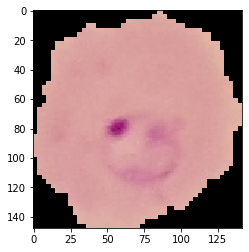

In [18]:
plt.imshow(para_cell)

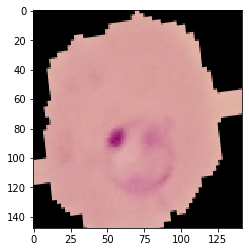

In [19]:
plt.imshow(image_gen.random_transform(para_cell))

In [20]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [21]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout

In [87]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=img_size, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape=img_size, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), input_shape=img_size, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [89]:
img_size

(130, 130, 3)

In [90]:
train_img = image_gen.flow_from_directory(train_path,
                                          target_size=(130,130),
                                          color_mode="rgb",
                                          batch_size=16,
                                          class_mode="binary")

Found 24958 images belonging to 2 classes.


In [91]:
test_img = image_gen.flow_from_directory(test_path,
                                         target_size=(130,130),
                                         color_mode="rgb",
                                         batch_size=16,
                                         class_mode="binary",
                                         shuffle=False)

Found 2600 images belonging to 2 classes.


In [92]:
train_img.class_indices

{'parasitized': 0, 'uninfected': 1}

In [93]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [94]:
model.fit(train_img, epochs=20, callbacks=[early_stop], validation_data=test_img)

Epoch 1/20
1560/1560 [==============================] - 1101s 706ms/step - loss: 1.0218 - accuracy: 0.5385 - val_loss: 0.6928 - val_accuracy: 0.5492
Epoch 2/20
1560/1560 [==============================] - 788s 505ms/step - loss: 0.6852 - accuracy: 0.5616 - val_loss: 0.6737 - val_accuracy: 0.5958
Epoch 3/20
1560/1560 [==============================] - 648s 415ms/step - loss: 0.6832 - accuracy: 0.5727 - val_loss: 0.6689 - val_accuracy: 0.5969
Epoch 4/20
1560/1560 [==============================] - 625s 400ms/step - loss: 0.6795 - accuracy: 0.5780 - val_loss: 0.6720 - val_accuracy: 0.5881
Epoch 5/20
1560/1560 [==============================] - 557s 357ms/step - loss: 0.6862 - accuracy: 0.5803 - val_loss: 0.6750 - val_accuracy: 0.5919


In [30]:
#from tensorflow.keras.models import load_model
#model = load_model("malaria.h5")

In [95]:
model.evaluate(test_img,verbose=0)

[0.6695502400398254, 0.5957692265510559]

In [96]:
model.metrics_names

['loss', 'accuracy']

In [97]:
preds = model.predict(test_img)

In [98]:
pred = preds>0.5

In [99]:
pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [100]:
len(pred)

2600

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
test_img.classes

array([0, 0, 0, ..., 1, 1, 1])

In [103]:
print(classification_report(test_img.classes, pred))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      1300
           1       0.57      0.67      0.61      1300

    accuracy                           0.58      2600
   macro avg       0.58      0.58      0.58      2600
weighted avg       0.58      0.58      0.58      2600



In [104]:
confusion_matrix(test_img.classes, pred)

array([[643, 657],
       [432, 868]], dtype=int64)

In [106]:
cell = train_path+"/parasitized"+"/C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [107]:
from tensorflow.keras.preprocessing import image
cell = image.load_img(cell, target_size=img_size)

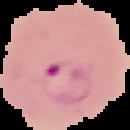

In [108]:
cell

In [109]:
img = image.img_to_array(cell)

In [110]:
img_ = img.reshape(1,130,130,3)

In [111]:
img_.shape

(1, 130, 130, 3)

In [112]:
model.predict(img_)

array([[0.44004798]], dtype=float32)

In [113]:
train_img.class_indices

{'parasitized': 0, 'uninfected': 1}

In [114]:
para_cell =  train_path+"/parasitized/"+"C100P61ThinF_IMG_20150918_144823_cell_161.png"

In [115]:
para_cell

'D:/datascience-Data/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144823_cell_161.png'

In [116]:
para_cell = image.load_img(para_cell, target_size=img_size)

In [117]:
para_cell = image.img_to_array(para_cell)

In [118]:
para_cell.shape

(130, 130, 3)

In [119]:
para_cell = para_cell.reshape(1,130,130,3)

In [120]:
para_cell.shape

(1, 130, 130, 3)

In [121]:
model.predict(para_cell)

array([[0.40943044]], dtype=float32)

In [122]:
model.save("Malaria_model.h5")